In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [63]:
df_north = pd.read_csv("../Resources/northern_county_market_no_symbols.csv")
df_central = pd.read_csv("../Resources/central_county_market_no_symbols.csv")
df_south = pd.read_csv("../Resources/southern_county_market_no_symbols.csv")

In [64]:
# Datetime
df_north['Start Date'] = pd.to_datetime(df_north['Start Date'])
df_north['End Date'] = pd.to_datetime(df_north['End Date'])
# Separate years
df_north_2022 = df_north[df_north['Start Date'] == '2022-01-01']
df_north_2023 = df_north[df_north['Start Date'] == '2023-01-01']
df_north_2024 = df_north[df_north['Start Date'] == '2024-01-01']

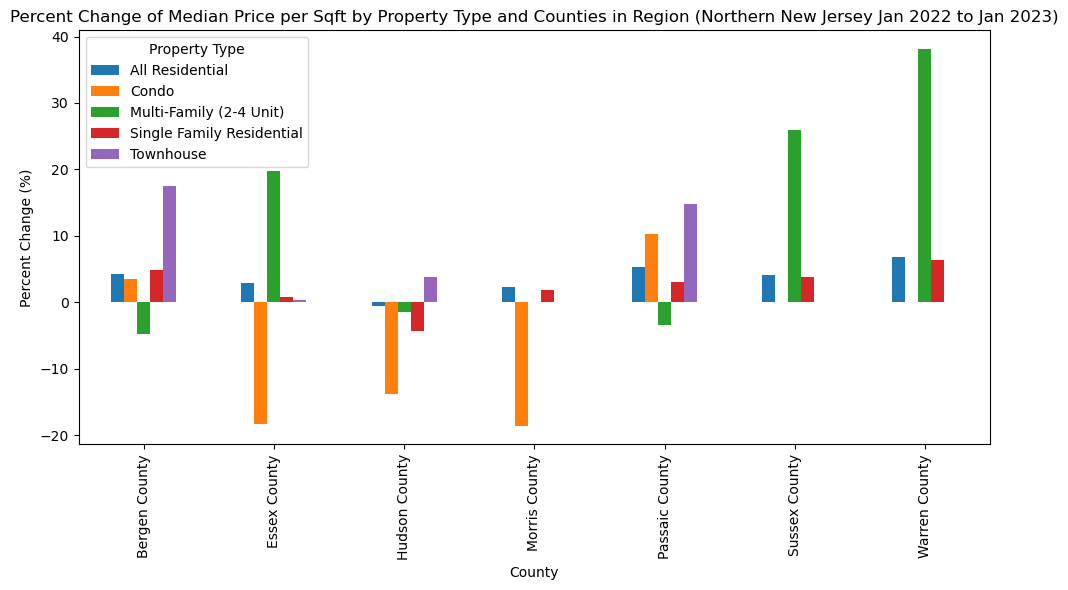

In [65]:
# Merge for percent change
df_north_merged = pd.merge(df_north_2022, df_north_2023, on=['County', 'Property Type'], suffixes=('_2022', '_2023'))
df_north_merged['Percent Change'] = ((df_north_merged['Median Price per Sqft_2023'] - df_north_merged['Median Price per Sqft_2022']) / df_north_merged['Median Price per Sqft_2022']) * 100

# Pivot table for plot
pivot_table_north = df_north_merged.pivot_table(values='Percent Change', index='County', columns='Property Type', fill_value=0)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
pivot_table_north.plot(kind='bar', ax=ax)
ax.set_title('Percent Change of Median Price per Sqft by Property Type and Counties in Region (Northern New Jersey Jan 2022 to Jan 2023)')
ax.set_xlabel('County')
ax.set_ylabel('Percent Change (%)')
ax.legend(title='Property Type', loc='upper left')
plt.tight_layout()
plt.show()


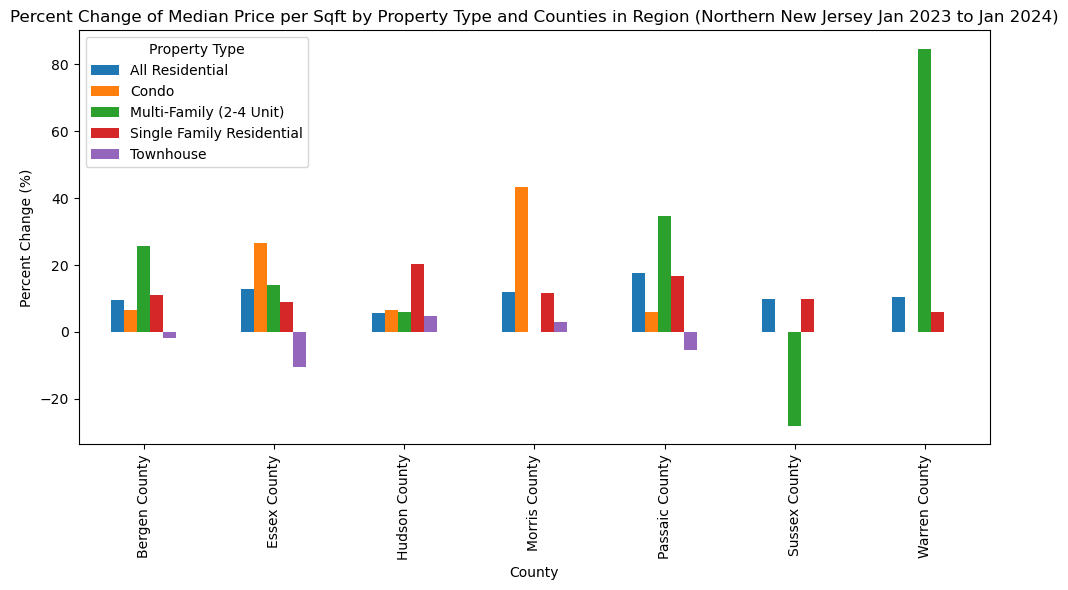

In [66]:
# Merge for percent change
df_north_merged2 = pd.merge(df_north_2023, df_north_2024, on=['County', 'Property Type'], suffixes=('_2023', '_2024'))
df_north_merged2['Percent Change'] = ((df_north_merged2['Median Price per Sqft_2024'] - df_north_merged2['Median Price per Sqft_2023']) / df_north_merged2['Median Price per Sqft_2023']) * 100

# Pivot table for plot
pivot_table_north2 = df_north_merged2.pivot_table(values='Percent Change', index='County', columns='Property Type', fill_value=0)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
pivot_table_north2.plot(kind='bar', ax=ax)
ax.set_title('Percent Change of Median Price per Sqft by Property Type and Counties in Region (Northern New Jersey Jan 2023 to Jan 2024)')
ax.set_xlabel('County')
ax.set_ylabel('Percent Change (%)')
ax.legend(title='Property Type', loc='upper left')
plt.tight_layout()
plt.show()


In [67]:
# Datetime
df_central['Start Date'] = pd.to_datetime(df_central['Start Date'])
df_central['End Date'] = pd.to_datetime(df_central['End Date'])
# Separate years
df_central_2022 = df_central[df_central['Start Date'] == '2022-01-01']
df_central_2023 = df_central[df_central['Start Date'] == '2023-01-01']
df_central_2024 = df_central[df_central['Start Date'] == '2024-01-01']

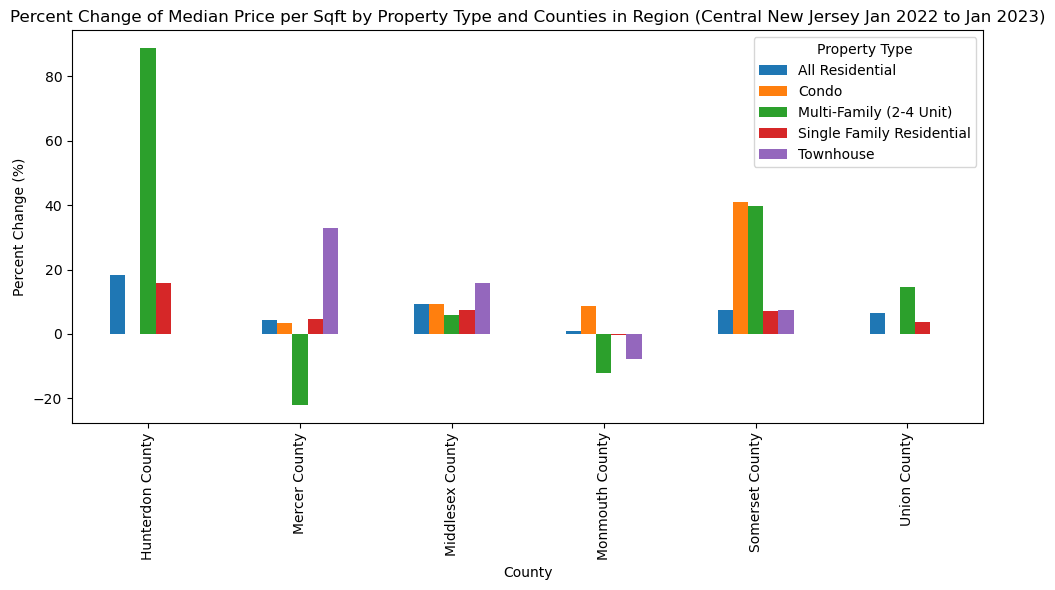

In [68]:
# Merge for percent change
df_central_merged = pd.merge(df_central_2022, df_central_2023, on=['County', 'Property Type'], suffixes=('_2022', '_2023'))
df_central_merged['Percent Change'] = ((df_central_merged['Median Price per Sqft_2023'] - df_central_merged['Median Price per Sqft_2022']) / df_central_merged['Median Price per Sqft_2022']) * 100

# Pivot table for plot
pivot_table_central = df_central_merged.pivot_table(values='Percent Change', index='County', columns='Property Type', fill_value=0)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
pivot_table_central.plot(kind='bar', ax=ax)
ax.set_title('Percent Change of Median Price per Sqft by Property Type and Counties in Region (Central New Jersey Jan 2022 to Jan 2023)')
ax.set_xlabel('County')
ax.set_ylabel('Percent Change (%)')
ax.legend(title='Property Type', loc='upper right')
plt.tight_layout()
plt.show()


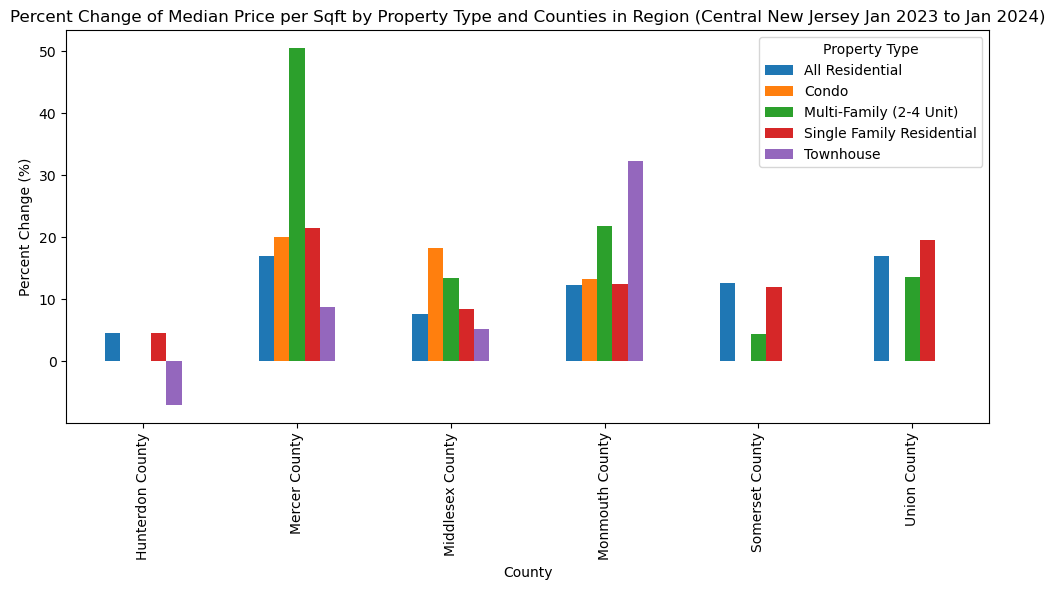

In [69]:
# Merge for percent change
df_central_merged2 = pd.merge(df_central_2023, df_central_2024, on=['County', 'Property Type'], suffixes=('_2023', '_2024'))
df_central_merged2['Percent Change'] = ((df_central_merged2['Median Price per Sqft_2024'] - df_central_merged2['Median Price per Sqft_2023']) / df_central_merged2['Median Price per Sqft_2023']) * 100

# Pivot table for plot
pivot_table_central2 = df_central_merged2.pivot_table(values='Percent Change', index='County', columns='Property Type', fill_value=0)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
pivot_table_central2.plot(kind='bar', ax=ax)
ax.set_title('Percent Change of Median Price per Sqft by Property Type and Counties in Region (Central New Jersey Jan 2023 to Jan 2024)')
ax.set_xlabel('County')
ax.set_ylabel('Percent Change (%)')
ax.legend(title='Property Type', loc='upper right')
plt.tight_layout()
plt.show()


In [70]:
# Datetime
df_south['Start Date'] = pd.to_datetime(df_south['Start Date'])
df_south['End Date'] = pd.to_datetime(df_south['End Date'])
# Separate years
df_south_2022 = df_south[df_south['Start Date'] == '2022-01-01']
df_south_2023 = df_south[df_south['Start Date'] == '2023-01-01']
df_south_2024 = df_south[df_south['Start Date'] == '2024-01-01']

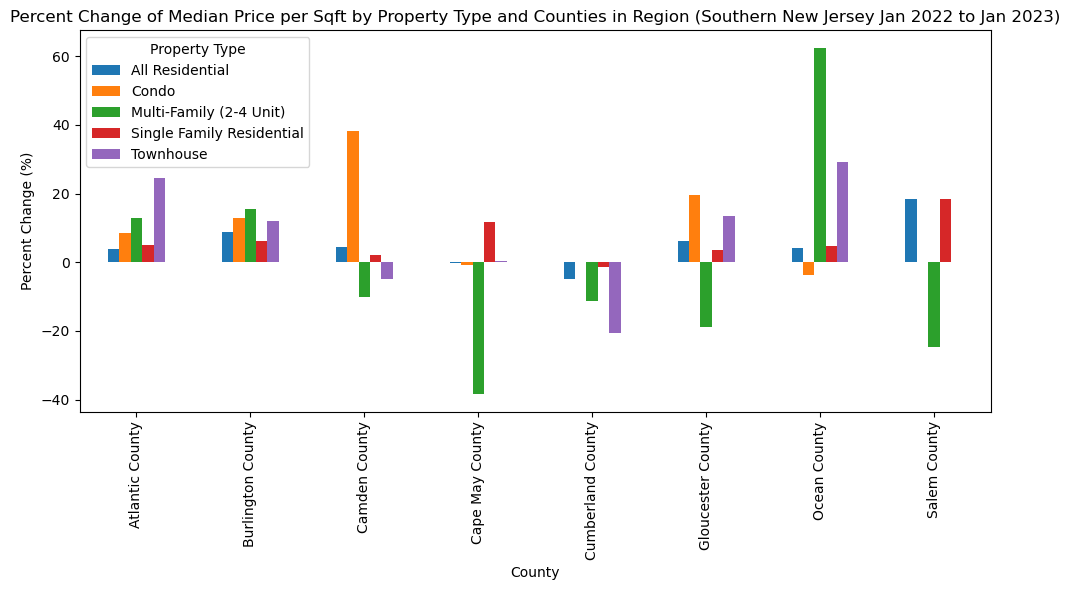

In [71]:
# Merge for percent change
df_south_merged = pd.merge(df_south_2022, df_south_2023, on=['County', 'Property Type'], suffixes=('_2022', '_2023'))
df_south_merged['Percent Change'] = ((df_south_merged['Median Price per Sqft_2023'] - df_south_merged['Median Price per Sqft_2022']) / df_south_merged['Median Price per Sqft_2022']) * 100

# Pivot table for plot
pivot_table_south = df_south_merged.pivot_table(values='Percent Change', index='County', columns='Property Type', fill_value=0)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
pivot_table_south.plot(kind='bar', ax=ax)
ax.set_title('Percent Change of Median Price per Sqft by Property Type and Counties in Region (Southern New Jersey Jan 2022 to Jan 2023)')
ax.set_xlabel('County')
ax.set_ylabel('Percent Change (%)')
ax.legend(title='Property Type', loc='upper left')
plt.tight_layout()
plt.show()


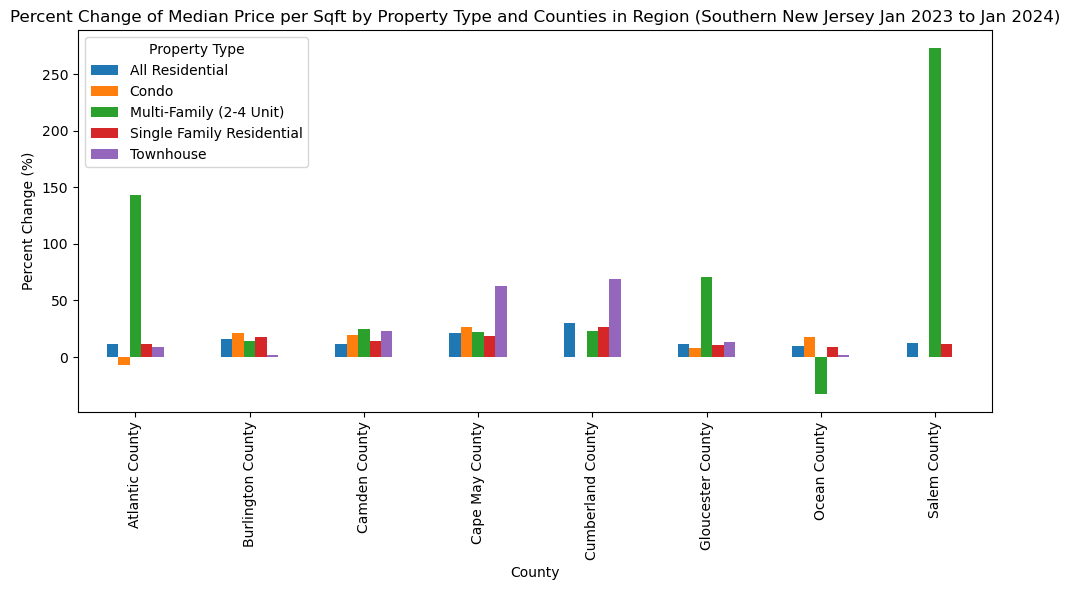

In [72]:
# Merge for percent change
df_south_merged2 = pd.merge(df_south_2023, df_south_2024, on=['County', 'Property Type'], suffixes=('_2023', '_2024'))
df_south_merged2['Percent Change'] = ((df_south_merged2['Median Price per Sqft_2024'] - df_south_merged2['Median Price per Sqft_2023']) / df_south_merged2['Median Price per Sqft_2023']) * 100

# Pivot table for plot
pivot_table_south2 = df_south_merged2.pivot_table(values='Percent Change', index='County', columns='Property Type', fill_value=0)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
pivot_table_south2.plot(kind='bar', ax=ax)
ax.set_title('Percent Change of Median Price per Sqft by Property Type and Counties in Region (Southern New Jersey Jan 2023 to Jan 2024)')
ax.set_xlabel('County')
ax.set_ylabel('Percent Change (%)')
ax.legend(title='Property Type', loc='upper left')
plt.tight_layout()
plt.show()


In [73]:
# Columns for double checking
columns = df_south_merged2.loc[:, ['Start Date_2023', 'Start Date_2024', 'County', 'Property Type', 'Median Price per Sqft_2023', 'Median Price per Sqft_2024']]
columns

,Start Date_2023,Start Date_2024,County,Property Type,Median Price per Sqft_2023,Median Price per Sqft_2024
0,2023-01-01,2024-01-01,Atlantic County,All Residential,176.55,196.54
1,2023-01-01,2024-01-01,Atlantic County,Condo,198.36,185.02
2,2023-01-01,2024-01-01,Atlantic County,Multi-Family (2-4 Unit),118.03,287.15
3,2023-01-01,2024-01-01,Atlantic County,Single Family Residential,178.57,198.49
4,2023-01-01,2024-01-01,Atlantic County,Townhouse,161.20,176.06
5,2023-01-01,2024-01-01,Burlington County,All Residential,192.27,222.65
6,2023-01-01,2024-01-01,Burlington County,Condo,171.29,207.94
7,2023-01-01,2024-01-01,Burlington County,Multi-Family (2-4 Unit),149.74,171.57
8,2023-01-01,2024-01-01,Burlington County,Single Family Residential,197.32,231.64
9,2023-01-01,2024-01-01,Burlington County,Townhouse,190.72,194.28


In [74]:
# For double checking
df_north_merged

,Start Date_2022,End Date_2022,County,Region_2022,State_2022,Property Type,Median Sale Price_2022,Median Sale Price MoM_2022,Median List Price_2022,Median List Price MoM_2022,...,Median Days on Market MoM_2023,Average Sale to List_2023,Average Sale to List MoM_2023,Sold Above List_2023,Sold Above List MoM_2023,Price Drops_2023,Price Drops MoM_2023,Off Market in Two Weeks_2023,Off Market in Two Weeks MoM_2023,Percent Change
0,2022-01-01,2022-01-31,Bergen County,North,NJ,All Residential,550000.0,-0.90%,"$579,000.00",5.27%,...,1200.00%,98.88%,-0.39%,37.35%,-4.04%,10.83%,2.60%,13.89%,7.32%,4.204872
1,2022-01-01,2022-01-31,Bergen County,North,NJ,Condo,310000.0,0.00%,"$579,000.00",5.27%,...,600.00%,96.91%,-0.92%,18.75%,-7.86%,11.01%,1.37%,8.16%,-2.61%,3.463005
2,2022-01-01,2022-01-31,Bergen County,North,NJ,Multi-Family (2-4 Unit),625000.0,0.99%,"$579,000.00",5.27%,...,2900.00%,97.46%,-3.94%,30.19%,-26.73%,7.06%,1.90%,18.18%,13.05%,-4.758330
3,2022-01-01,2022-01-31,Bergen County,North,NJ,Single Family Residential,587000.0,1.21%,"$579,000.00",5.27%,...,900.00%,99.47%,0.27%,42.95%,0.51%,11.49%,2.38%,15.92%,9.96%,4.808424
4,2022-01-01,2022-01-31,Bergen County,North,NJ,Townhouse,670000.0,0.00%,"$579,000.00",5.27%,...,4500.00%,100.84%,0.57%,47.37%,3.97%,12.32%,7.03%,0.00%,-4.55%,17.470404
5,2022-01-01,2022-01-31,Essex County,North,NJ,All Residential,463500.0,-3.08%,"$485,000.00",14.12%,...,900.00%,102.18%,-0.45%,55.61%,0.29%,9.98%,1.03%,31.91%,13.36%,2.842000
6,2022-01-01,2022-01-31,Essex County,North,NJ,Condo,240000.0,0.21%,"$485,000.00",14.12%,...,0.00%,101.47%,1.68%,50.00%,21.43%,6.49%,-7.35%,40.00%,27.50%,-18.333273
7,2022-01-01,2022-01-31,Essex County,North,NJ,Multi-Family (2-4 Unit),475000.0,10.47%,"$485,000.00",14.12%,...,700.00%,101.98%,-0.56%,53.39%,-3.02%,6.86%,3.06%,22.09%,6.79%,19.708962
8,2022-01-01,2022-01-31,Essex County,North,NJ,Single Family Residential,485000.0,-7.62%,"$485,000.00",14.12%,...,1200.00%,102.38%,-0.42%,56.96%,0.73%,13.30%,0.49%,37.06%,15.95%,0.812117
9,2022-01-01,2022-01-31,Essex County,North,NJ,Townhouse,482500.0,5.35%,"$485,000.00",14.12%,...,800.00%,100.82%,-5.86%,75.00%,0.00%,12.50%,-7.50%,0.00%,0.00%,0.375241


In [75]:
df_north_essex = df_north[df_north['County'] == 'Essex County']
df_north_essex

,Start Date,End Date,County,Region,State,Property Type,Median Sale Price,Median Sale Price MoM,Median List Price,Median List Price MoM,...,Median Days on Market,Median Days on Market MoM,Average Sale to List,Average Sale to List MoM,Sold Above List,Sold Above List MoM,Price Drops,Price Drops MoM,Off Market in Two Weeks,Off Market in Two Weeks MoM
140,2022-01-01,2022-01-31,Essex County,North,NJ,All Residential,463500.0,-3.08%,"$485,000.00",14.12%,...,45,500.00%,103.41%,-0.44%,59.62%,-3.10%,5.20%,-1.33%,34.05%,11.45%
141,2022-01-01,2022-01-31,Essex County,North,NJ,Condo,240000.0,0.21%,"$485,000.00",14.12%,...,81,800.00%,99.81%,-0.44%,36.84%,-8.40%,6.12%,-2.65%,14.29%,-13.71%
142,2022-01-01,2022-01-31,Essex County,North,NJ,Multi-Family (2-4 Unit),475000.0,10.47%,"$485,000.00",14.12%,...,71,1300.00%,101.99%,0.41%,57.86%,-3.50%,2.87%,-1.82%,25.00%,2.36%
143,2022-01-01,2022-01-31,Essex County,North,NJ,Single Family Residential,485000.0,-7.62%,"$485,000.00",14.12%,...,34,0.00%,104.46%,-0.52%,62.77%,-2.06%,7.50%,-0.22%,41.41%,19.19%
144,2022-01-01,2022-01-31,Essex County,North,NJ,Townhouse,482500.0,5.35%,"$485,000.00",14.12%,...,28,-2300.00%,102.03%,1.58%,61.11%,11.11%,0.00%,0.00%,28.57%,8.57%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2024-04-01,2024-04-30,Essex County,North,NJ,All Residential,619000.0,10.54%,"$649,900.00",5.94%,...,28,-1000.00%,108.32%,2.26%,73.56%,2.60%,9.21%,2.23%,40.65%,-2.81%
276,2024-04-01,2024-04-30,Essex County,North,NJ,Condo,327000.0,-6.57%,"$649,900.00",5.94%,...,28,-200.00%,107.83%,3.30%,69.23%,15.38%,11.22%,1.85%,42.86%,6.75%
277,2024-04-01,2024-04-30,Essex County,North,NJ,Multi-Family (2-4 Unit),615000.0,11.82%,"$649,900.00",5.94%,...,58,-1000.00%,104.48%,1.37%,65.60%,1.60%,6.59%,1.39%,19.05%,-7.14%
278,2024-04-01,2024-04-30,Essex County,North,NJ,Single Family Residential,675000.0,12.50%,"$649,900.00",5.94%,...,21,-600.00%,110.21%,2.65%,77.99%,2.24%,11.15%,3.09%,47.45%,-4.71%


In [76]:
essex_county_summary = df_north_essex.groupby('Property Type').agg(Total_Properties = ('Property Type', 'count'), Average_Price_per_Sqft = ('Median Price per Sqft', 'mean'))

In [77]:
essex_county_summary['Average_Price_per_Sqft'] = essex_county_summary['Average_Price_per_Sqft'].round(2)
essex_county_summary

,Total_Properties,Average_Price_per_Sqft
Property Type,,
All Residential,28,303.27
Condo,28,281.85
Multi-Family (2-4 Unit),28,202.68
Single Family Residential,28,344.89
Townhouse,28,283.34


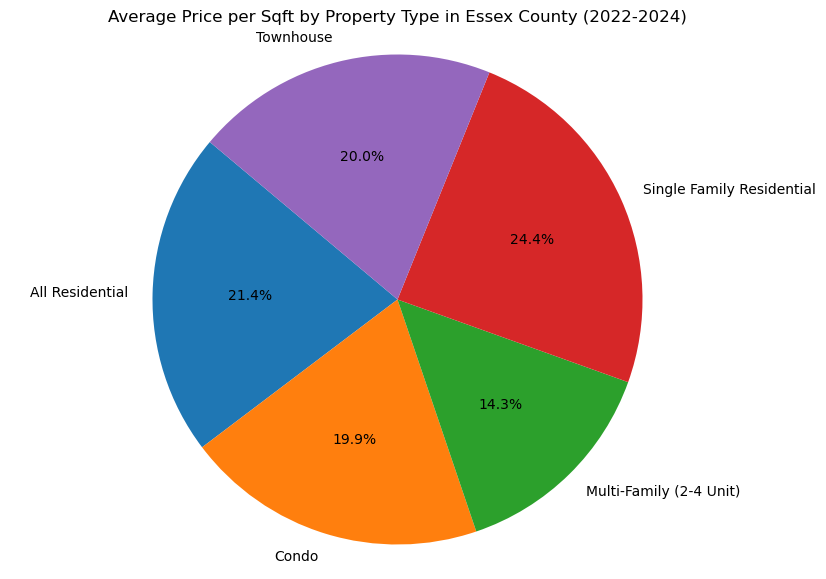

In [78]:
total_average_price = essex_county_summary['Average_Price_per_Sqft'].sum()

# Percentage
essex_county_summary['Price_Percentage'] = (essex_county_summary['Average_Price_per_Sqft'] / total_average_price) * 100

# Plot pie chart
plt.figure(figsize=(10, 7))
plt.pie(
    essex_county_summary['Price_Percentage'], 
    labels=essex_county_summary.index, 
    autopct='%1.1f%%', 
    startangle=140
)
plt.title('Average Price per Sqft by Property Type in Essex County (2022-2024)')
plt.axis('equal')
plt.show()

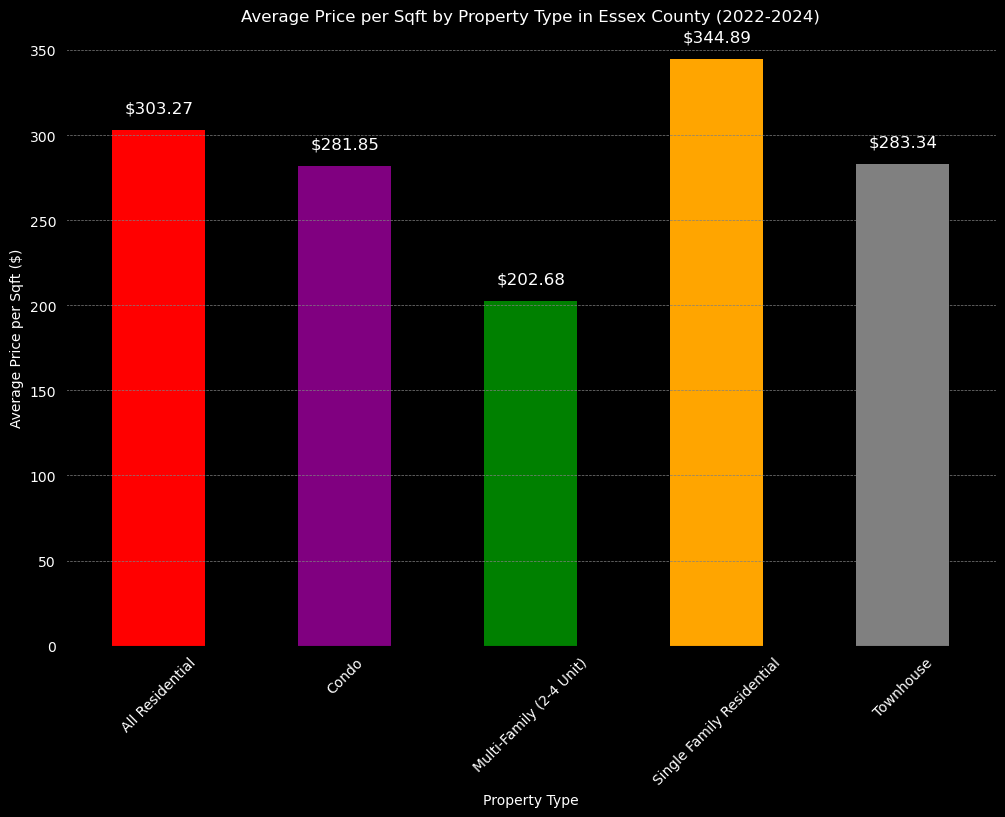

In [79]:
essex_county_summary = pd.DataFrame({
    'Average_Price_per_Sqft': [303.27, 281.85, 202.68, 344.89, 283.34]
}, index=['All Residential', 'Condo', 'Multi-Family (2-4 Unit)', 'Single Family Residential', 'Townhouse'])

# Define the colors for each property type in the order they appear in the DataFrame
colors = ['red', 'purple', 'green', 'orange', 'gray']

plt.figure(figsize=(12, 8), facecolor='black')

# Plotting the bar chart
ax = essex_county_summary['Average_Price_per_Sqft'].plot(kind='bar', color=colors)

# Title and labels
plt.title('Average Price per Sqft by Property Type in Essex County (2022-2024)', color='white')
plt.xlabel('Property Type', color='white')
plt.ylabel('Average Price per Sqft ($)', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.gca().set_facecolor('black')
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# Adding the price annotations
for idx, value in enumerate(essex_county_summary['Average_Price_per_Sqft']):
    ax.text(idx, value + 10, f'${value:.2f}', ha='center', color='white', fontsize=12)

plt.show()